# Grid Transormation

Before plotting permittivity tensor components, try transforming the grid to see if it has the expected form. Hence, we will know that transformations are correct and the problem is something different when it comes to plotting permittivities (if they do not seem correct) 

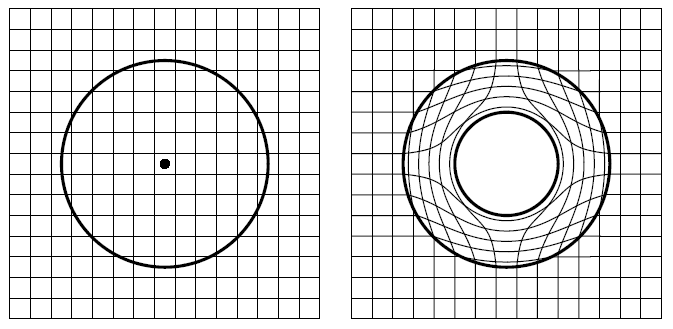

The case illustrated in the figure corresponds to the transformation $r = R_1+r'(R_2-R_1)/R_2$
in cylindrical coordinates where the prime refers to the radius in electromagnetic space.

The region with radius $R_1$ is invisible;

$R_2 - R_1$ describes the thickness of the cloaking
layer.

In [1]:
import sympy as sp

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sympy.vector import *
from IPython.display import Math
sp.init_printing(use_unicode=True)

## Plotting the cartesian grid

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

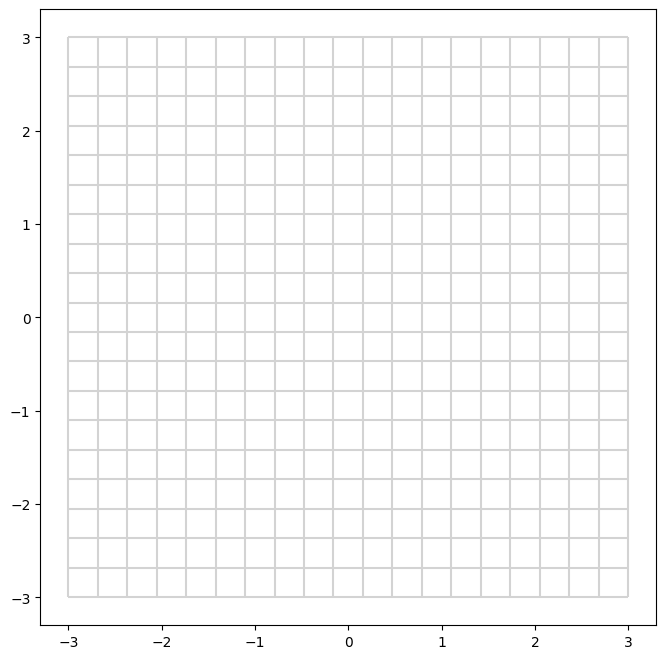

In [3]:


def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    ax.set_aspect('equal')
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

grid_x,grid_y = np.meshgrid(np.linspace(-3,3,20),np.linspace(-3,3,20))
plot_grid(grid_x,grid_y, ax=ax,  color="lightgrey")



plt.show()


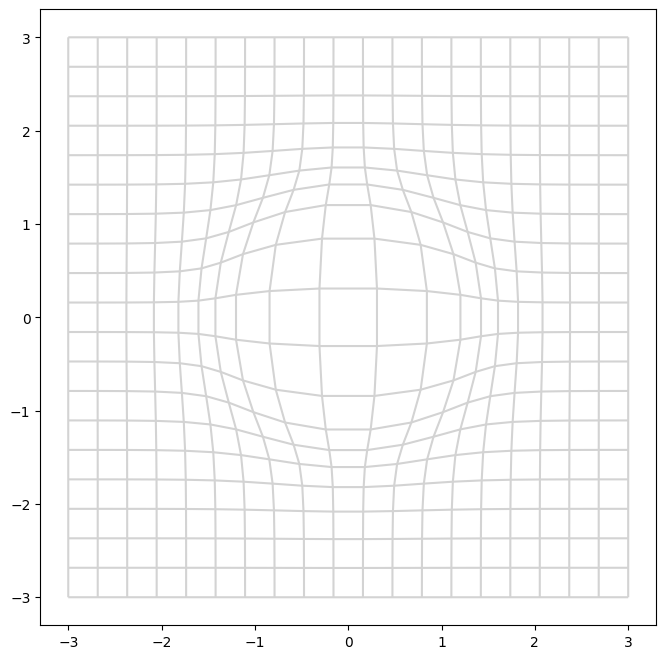

In [28]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

sigma_x, sigma_y = 1,1  # shear parameters

grid_x_prime = grid_x*(1+np.exp(-(grid_x**2/sigma_x)-(grid_y**2/sigma_y)))
grid_y_prime = grid_y*(1+np.exp(-(grid_x**2/sigma_x)-(grid_y**2/sigma_y)))

plot_grid(grid_x_prime,grid_y_prime, ax=ax,  color="lightgrey")



plt.show()

## Plotting the polar grid

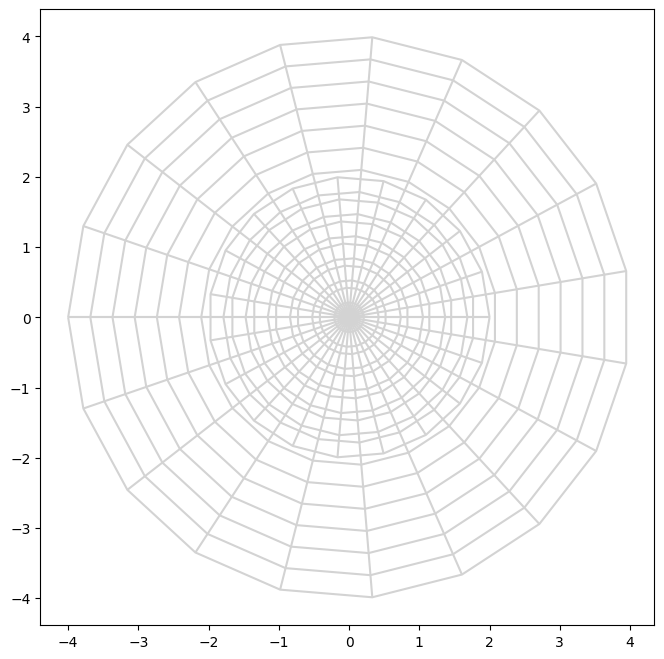

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

grid_r,grid_phi = np.meshgrid(np.linspace(0,3,20),np.linspace(-np.pi,np.pi,20))
grid_rp = ((grid_r-R1)*R2)/(R2-R1)
grid_x_pol, grid_y_pol = grid_rp*np.cos(grid_phi), grid_rp*np.sin(grid_phi)
grid_x_prime = grid_x*(1+1/r)
grid_y_prime = grid_y*(1+1/r)
plot_grid(grid_x_pol,grid_y_pol, ax=ax,  color="lightgrey")


plt.show()

Transform the radius, $r= R_1 + r'(R_2-R_1)/R_2$

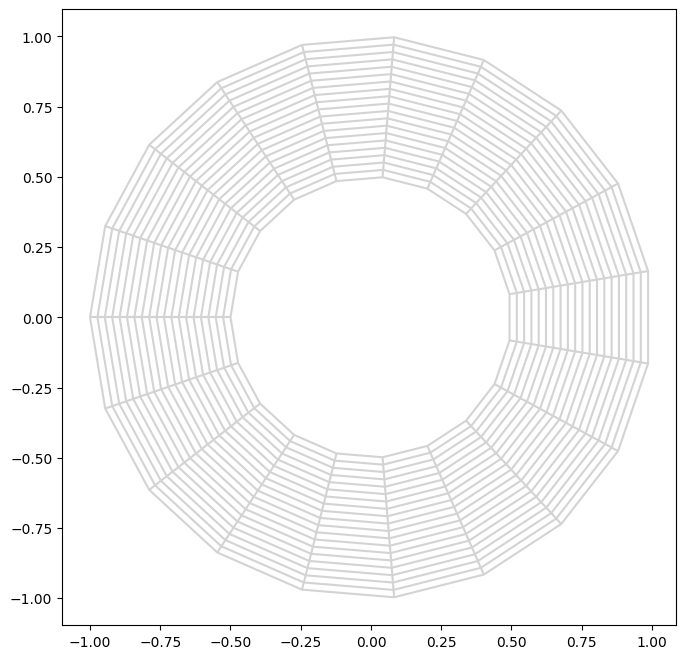

In [6]:
R1 = 0.5
R2 = 0.6

grid_r_prime = R1+grid_r*(R2-R1)/R2
grid_phi_prime = grid_phi

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

grid_x_pol_trans, grid_y_pol_trans = grid_r_prime*np.cos(grid_phi_prime), grid_r_prime*np.sin(grid_phi_prime)
plot_grid(grid_x_pol_trans,grid_y_pol_trans, ax=ax,  color="lightgrey")


plt.show()

## Define transformations

In [7]:


x_smb, y_smb, r_smb, phi_smb = sp.symbols('x, y, r, phi')

xy_vec_cart = sp.Matrix([[x_smb], [y_smb]])
xy_vec_pol = sp.Matrix([[r_smb*sp.cos(phi_smb)], [r_smb*sp.sin(phi_smb)]])

display(Math(sp.latex(xy_vec_cart) + r' = '+sp.latex(xy_vec_pol)))

<IPython.core.display.Math object>

Define Jacobian

In [8]:
jac_xy_rphi = sp.Matrix([[xy_vec_pol[0].diff(r_smb), xy_vec_pol[0].diff(phi_smb)],
                         [xy_vec_pol[1].diff(r_smb), xy_vec_pol[1].diff(phi_smb)]])

det_jac_xy_rphi = sp.simplify(sp.det(jac_xy_rphi))

display(Math(r'\Lambda = \frac{\partial (x,y)}{\partial (r, \phi)} = '+sp.latex(jac_xy_rphi)))
display(Math(r'J = det \left( \frac{\partial (x,y)}{\partial (r, \phi)} \right) = '+sp.latex(det_jac_xy_rphi)))
display(Math(r'dx dy = {} dr d\phi'.format(det_jac_xy_rphi)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Cartesian metric is $g_{ij} =\delta_{ij}$. Can get metric in polars: $[g_{i'j'}] = G_{pol} = \Lambda^T G_{cart} \Lambda$